# NOISE TEST

In [150]:

import numpy as np
import matplotlib.pyplot as plt
import math
import os
import sys
from sys import platform

# Configurações
image_size = 224  # Tamanho da imagem

# Gerar coordenadas aleatórias para os pontos
y_coords = []
x_coords = []

# counting the steps
i, j = 0, 0
count_step = 0

A lista de parametros abaixo faz referência as regiões das distribuições de pontos. Só para entender bem, olhando cada seção no código abaixo. Para distinguir no plot, mudar a cor de cada região.

In [151]:
############## DEFINITIONS ##############
RANGE1, RANGE2, STEP = [-25, 25, 15]
BOUND1, BOUND2 = [1, 1] #[200, 350]
DIVIDER1_a, DIVIDER1_b = [30, 50] 
DIVIDER2_a, DIVIDER2_b = [35, 60] 
############## DENTRO BAIXO (DB) ##############
# linha principal de baixo até o meio
DIVIDER_LIM, DB_D1_a, DB_D1_b, DB_D2_a, DB_D2_b = [100, 30, 70, 30, 70]
DB_BOUND1, DB_BOUND2 = [5, 7]
DB_RANGE1, DB_RANGE2 = [image_size//15, (6*image_size)//10]
DB_COLOR = 'black'
############## DENTRO TOPO (DT) ############## 
# linha rala na parte de cima
DT_CLUST1, DT_CLUST2, DT_POINTS = [4, 15, 2]
DT_BOUND1, DT_BOUND2 = [2, 10]
DT_RANGE1, DT_RANGE2 = [2*image_size//3, image_size]
DT_COLOR = 'black'
############## FORA 1 ##############
# acumulo de pontos na parte inferior
F1_CLUST1, F1_CLUST2, F1_POINTS = [3, 10, 3]
F1_BOUND1, F1_BOUND2 = [8, 18]
F1_RANGE1, F1_RANGE2 = [(image_size//8), (image_size//5)]
F1_COLOR = 'black'
############## FORA 2 ##############
F2_CLUST1, F2_CLUST2, F2_POINTS = [8, 20, 3]
F2_BOUND1_a, F2_BOUND1_b = [13, 14]
F2_BOUND2_a, F2_BOUND2_b = [14, 15]
F2_RANGE1, F2_RANGE2 = [0, (2*image_size//3)]
F2_COLOR = 'black'
############## FORA CIMA ##############
# linhas adjacentes
FC_LIM, FC_D1_a, FC_D1_b, FC_D2_a, FC_D2_b = [20, 3, 50, 3, 40]
FC_BOUND1, FC_BOUND2 = [30, 35]
FC_RANGE1, FC_RANGE2 = [image_size//6, image_size]
FC_COLOR = 'black'
############## FORA BAIXO ##############
FB_CLUST1, FB_CLUST2, FB_POINTS = [1, 4, 5]
FB_BOUND1, FB_BOUND2 = [50, 51]
FB_CENTRAL1, FB_CENTRAL2 = [image_size//12, image_size//5]
FB_COLOR = 'black'
############## RANDOM ##############
RND_RANGE1, RND_RANGE2 = [34, 35]
RND_COLOR = '#565656'

In [152]:
NPLOTS = 2

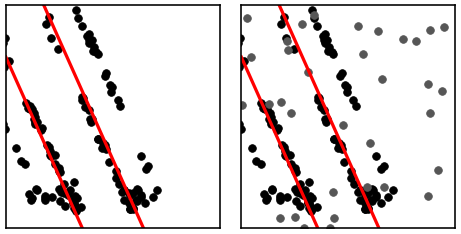

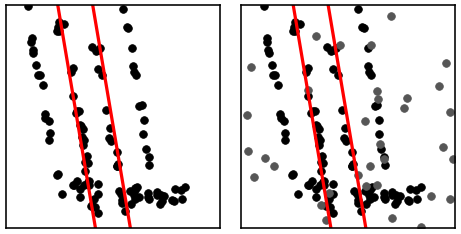

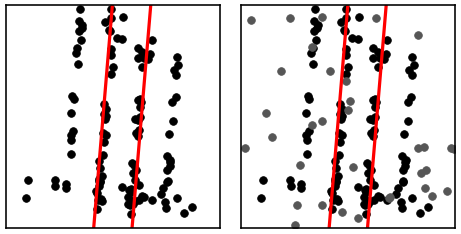

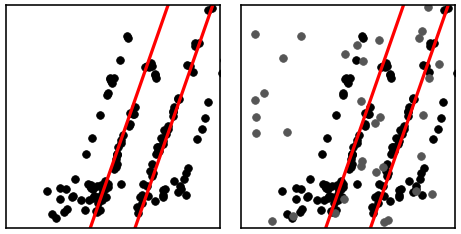

In [153]:
# rotacionar as retas
for angle in range(RANGE1, RANGE2, STEP):
    i+=1
    j = 0
    if angle < -15 or angle > 15:
        bound = BOUND1
    else: 
        bound = BOUND2
    while j < bound:
        count_step += 1
        j += 1
        #* ################ DEFINITION ################

        pivot = (np.random.randint(82, 142), 0)
        if pivot[0] < 97 or pivot[0] > 127:
            divider = np.random.randint(DIVIDER1_a, DIVIDER1_b)  # Espaçamento entre as retas
        else: 
            divider = np.random.randint(DIVIDER2_a, DIVIDER2_b)

        # prevent problems with the angle
        if angle < -40 or angle > 40:
            divider -= 20
        
        # prevent problem with zero division
        if angle == 0:
            angle += 1
        
        #* ################ CREATE LINES ################

        # Equação da reta para as retas paralelas VERTICAIS (m = y2 - y1, sendo x2 - x1 = 1 forçado)
        # 
        x1 = image_size // 2 - divider // 2  # Coordenada x para a primeira reta (vertical)
        x2 = image_size // 2 + divider // 2  # Coordenada x para a segunda reta (vertical)

        # equação reta vertical (angle = 0): y = mx + b => m = y2 - y1 e b = y1 - (y2 - y1)*x1
        y1_1, y2_1 = 0, 0
        y1_2, y2_2 = image_size, image_size
        m1 = (y1_2 - y1_1)
        m2 = (y2_2 - y2_1)
        b1 = y1_2 - (y1_2 - y1_1)*x1
        b2 = y2_2 - (y2_2 - y2_1)*x2

        # Gerar coordenadas aleatórias para os pontos
        x_coords = []
        y_coords = []

        #* ################ ROTATE LINES ################

        # RETA VERTICAL
        x1 = np.full(image_size, image_size // 2 - divider // 2)
        x2 = np.full(image_size, image_size // 2 + divider // 2)

        y1 = range(image_size)
        y2 = range(image_size)

        # ROTATION POINTS
        rot_point_np = np.array([pivot[0], pivot[1]])
        rot_point = (pivot[0], pivot[1])

        # ROTATION MATRIX (
        rotation_matrix = np.array([[np.cos(np.radians(angle)), np.sin(np.radians(angle)), rot_point_np[0]*(1-np.cos(np.radians(angle)))-rot_point_np[1]*np.sin(np.radians(angle))], 
                                    [-np.sin(np.radians(angle)), np.cos(np.radians(angle)), rot_point_np[1]*(1-np.cos(np.radians(angle)))+rot_point_np[0]*np.sin(np.radians(angle))], 
                                    [0, 0, 1]])

        # add one dim to the points for matrix multiplication
        points1 = np.stack((x1, y1, np.ones_like(x1)))
        points2 = np.stack((x2, y2, np.ones_like(x2)))

        # apply transformation
        transformed_points1 = rotation_matrix @ points1
        transformed_points2 = rotation_matrix @ points2

        # get the new points
        x1_rotated = transformed_points1[0]
        y1_rotated = transformed_points1[1]
        x2_rotated = transformed_points2[0]
        y2_rotated = transformed_points2[1]

        # get the new line parameters
        m1r, b1r = np.polyfit(x1_rotated, y1_rotated, 1)
        m2r, b2r = np.polyfit(x2_rotated, y2_rotated, 1)
        
        # new lines 
        x_line = np.arange(0, image_size, 1)
        y1_line_rotated = m1r*x_line + b1r
        y2_line_rotated = m2r*x_line + b2r


        #* ################ GENERATE POINTS ################

        # PLOT
        fig, ax = plt.subplots(1, NPLOTS, figsize=(5*NPLOTS, 5), dpi=58)
        plt.subplots_adjust(wspace=0.1) 
        [ax[_].set_xlim(0, image_size) for _ in range(NPLOTS)]
        [ax[_].set_ylim(0, image_size) for _ in range(NPLOTS)]
        #ax.set_xlim(0, image_size)
        #ax.set_ylim(0, image_size)

        #################### Dentro Baixo ####################

        # Gerar pontos entre as retas
        if divider > DIVIDER_LIM:
            d = np.random.randint(DB_D1_a, DB_D1_b)
        else: 
            d = np.random.randint(DB_D2_a, DB_D2_b)
        for _ in range(d): # points
            boundary = np.random.randint(DB_BOUND1, DB_BOUND2)
            # escolher um y aleatorio entre 0 e 224
            y = np.random.randint(DB_RANGE1, DB_RANGE2)
            # achar o limiar da reta de boundary para aquele x e da reta normal
            x1_boundary = (y - b1r) / m1r
            x2_boundary = (y - b2r) / m2r
            # fit do x1 e x2 com os boundarys
            x = np.random.choice([np.random.randint(x1_boundary, x1_boundary + boundary), np.random.randint(x2_boundary - boundary, x2_boundary)])
            x_coords.append(x)
            y_coords.append(y)
        [ax[_].scatter(x_coords, y_coords, s=90, c=DB_COLOR) for _ in range(NPLOTS)]
        x_coords = []
        y_coords = []

        # #################### Dentro Topo ####################

        num_clusters = np.random.randint(DT_CLUST1, DT_CLUST2)  # Número de subconjuntos
        # Gerar pontos com aglomeração em subconjuntos #! parte de cima (obstrução do lidar)
        for _ in range(num_clusters):
            points_per_cluster = DT_POINTS  # Número de pontos por subconjunto
            boundary = np.random.randint(DT_BOUND1, DT_BOUND2)
            # escolher um y aleatorio entre 0 e 224
            central_y = np.random.randint(DT_RANGE1, DT_RANGE2)
            # achar o limiar da reta de boundary para aquele x e da reta normal
            x1_boundary = (central_y - b1r) / m1r
            x2_boundary = (central_y - b2r) / m2r
            central_x = np.random.choice([np.random.randint(x1_boundary, x1_boundary + boundary), np.random.randint(x2_boundary - boundary, x2_boundary)])
            # Gerar pontos no subconjunto
            for _ in range(points_per_cluster):
                # Gerar deslocamentos usando uma distribuição normal
                dx = 2*np.random.normal(0, 2)  # Deslocamento em x
                dy = 2*np.random.normal(0, 2)  # Deslocamento em y
                # round dx and dy with numpy
                dx = np.round(dx, 0)
                dy = np.round(dy, 0)
                # Calcular as coordenadas do ponto com base no ponto central e nos deslocamentos
                x = int(round(central_x + dx))
                y = int(round(central_y + dy))
                x_coords.append(x)
                y_coords.append(y)
        [ax[_].scatter(x_coords, y_coords, s=90, c=DT_COLOR) for _ in range(NPLOTS)]
        x_coords = []
        y_coords = []

        # #################### Fora 1 ####################

        num_clusters = np.random.randint(F1_CLUST1, F1_CLUST2)  # Número de subconjuntos
        # Gerar pontos com aglomeração em subconjuntos #! pontos de fora das retas
        for cluster in range(num_clusters):
            points_per_cluster = F1_POINTS  # Número de pontos por subconjunto
            boundary = np.random.randint(F1_BOUND1, F1_BOUND2)
            # escolher um y aleatorio entre 0 e 224
            central_y = np.random.randint(F1_RANGE1, F1_RANGE2)
            # achar o limiar da reta de boundary para aquele x e da reta normal
            x1_boundary = (central_y - b1r) / m1r
            x2_boundary = (central_y - b2r) / m2r
            central_x = np.random.choice([np.random.randint(x1_boundary - boundary, x1_boundary), np.random.randint(x2_boundary, x2_boundary + boundary)])
            # Gerar pontos no subconjunto
            for _ in range(points_per_cluster):
                # Gerar deslocamentos usando uma distribuição normal (com baixa probabilidade de invadir o meio, se invadir é pouco)
                if central_x > x2_boundary:
                    dx = np.random.choice([abs(5*np.random.normal(0, 2)), -abs(5*np.random.normal(0, 2))])  # Deslocamento em x
                if central_x <= x1_boundary:
                    dx = np.random.choice([-abs(5*np.random.normal(0, 2)), +abs(5*np.random.normal(0, 2))])  # Deslocamento em x
                dy = 2.5*np.random.normal(0, 2)  # Deslocamento em y
                # round dx and dy with numpy
                dx = np.round(dx, 0)
                dy = np.round(dy, 0)
                # Calcular as coordenadas do ponto com base no ponto central e nos deslocamentos
                x = int(round(central_x + dx))
                y = int(round(central_y + dy))
                x_coords.append(x)
                y_coords.append(y)
        [ax[_].scatter(x_coords, y_coords, s=90, c=F1_COLOR) for _ in range(NPLOTS)]
        x_coords = []
        y_coords = []


        # #################### Fora 2 ####################

        # #################### Fora Cima ####################

        # Gerar pontos nos primeiros pixels de fora de cada reta (altura de cima)
        # linhas de plantação adjacentes
        if angle < -FC_LIM or angle > FC_LIM:
            a, b = [FC_D1_a, FC_D1_b]
        else:
            a, b = [FC_D2_a, FC_D2_b]
        for _ in range(np.random.randint(a, b)):
            boundary = np.random.randint(FC_BOUND1, FC_BOUND2)
            # escolher um y aleatorio entre 0 e 224
            y = np.random.randint(FC_RANGE1, FC_RANGE2)
            x1_boundary = (y - b1r) / m1r
            x2_boundary = (y - b2r) / m2r
            # fit do x1 e x2 com os boundarys
            x = np.random.choice([x1_boundary - boundary, x2_boundary + boundary])
            x_coords.append(x)
            y_coords.append(y)
        [ax[_].scatter(x_coords, y_coords, s=90, c=FC_COLOR) for _ in range(NPLOTS)]
        x_coords = []
        y_coords = []

        # #################### Fora baixo ####################

        num_clusters = np.random.randint(FB_CLUST1, FB_CLUST2)  # Número de subconjuntos
        # Gerar pontos com aglomeração em subconjuntos 
        for cluster in range(num_clusters):
            points_per_cluster = FB_POINTS  # Número de pontos por subconjunto
            boundary = np.random.randint(FB_BOUND1, FB_BOUND2)
            central_y = np.random.randint(FB_CENTRAL1, FB_CENTRAL2)
            # achar o limiar da reta de boundary para aquele x e da reta normal
            x1_boundary = (central_y - b1r) / m1r
            x2_boundary = (central_y - b2r) / m2r
            central_x = np.random.choice([np.random.randint(x1_boundary - boundary, x1_boundary - 2*boundary//3), np.random.randint(x2_boundary + 2*boundary//3, x2_boundary + boundary)])
            # Gerar pontos no subconjunto
            for _ in range(points_per_cluster):
                # Gerar deslocamentos usando uma distribuição normal (com baixa probabilidade de invadir o meio, se invadir é pouco)
                if central_x > x2_boundary:
                    dx = np.random.choice([abs(5*np.random.normal(0, 2)), -abs(5*np.random.normal(0, 2))])  # Deslocamento em x
                if central_x <= x1_boundary:
                    dx = np.random.choice([-abs(5*np.random.normal(0, 2)), +abs(5*np.random.normal(0, 2))])  # Deslocamento em x
                dy = 2.5*np.random.normal(0, 2)  # Deslocamento em y
                # round dx and dy with numpy
                dx = np.round(dx, 0)
                dy = np.round(dy, 0)
                # Calcular as coordenadas do ponto com base no ponto central e nos deslocamentos
                x = int(round(central_x + dx))
                y = int(round(central_y + dy))
                x_coords.append(x)
                y_coords.append(y)
        [ax[_].scatter(x_coords, y_coords, s=90, c=FB_COLOR) for _ in range(NPLOTS)]
        x_coords = []
        y_coords = []

        # #################### Random ####################

        # Gerar pontos aleatórios ao longo da imagem
        for _ in range(np.random.randint(RND_RANGE1, RND_RANGE2)):
            x = np.random.randint(0, image_size)
            y = np.random.randint(0, image_size)
            x_coords.append(x)
            y_coords.append(y)
        [ax[_].scatter(x_coords, y_coords, s=90, c=RND_COLOR) for _ in range(1,NPLOTS)]
        x_coords = []
        y_coords = []
        
        # Remover as bordas e ticks dos eixos
        [ax[_].set_xticks([]) for _ in range(NPLOTS)]
        [ax[_].set_yticks([]) for _ in range(NPLOTS)]
        [ax[_].axis('on') for _ in range(NPLOTS)]
        #[ax[_].set_title(f'Angle: {angle}°') for _ in range(NPLOTS)]
        #fig.suptitle(f'Angle: {angle}°')

        # Increase the width of the plot axis lines
        [ax[_].spines['bottom'].set_linewidth(2) for _ in range(NPLOTS)]  # Increase bottom axis line width
        [ax[_].spines['left'].set_linewidth(2) for _ in range(NPLOTS)]    # Increase left axis line width
        [ax[_].spines['top'].set_linewidth(2) for _ in range(NPLOTS)]     # Increase top axis line width
        [ax[_].spines['right'].set_linewidth(2) for _ in range(NPLOTS)]   # Increase right axis line width

        [ax[_].plot(x_line, y1_line_rotated, 'r', linewidth=4) for _ in range(0,NPLOTS)]
        [ax[_].plot(x_line, y2_line_rotated, 'r', linewidth=4) for _ in range(0,NPLOTS)]


